In [1]:
# Author TrucLK
# Final assignement
# Cluster the 5th dataset
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec
from sklearn import cluster
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt
import numpy as np


dataset = """
AABAAABBBAACD,
ACDAAABBBCCCDDD,
CCDDDCDDDDDCCC,
ABCDEABCDEABCDE,
ABBBBBBBBBBB,
DEADEADDDDDE,
BCBBBBCDCBBEEEEE,
ABCAAAABBE,
ABBEEABCEE,
ABCBCBCBCDDD
"""

In [2]:
sentences = dataset.replace("\n","").split(",")
sentences

['AABAAABBBAACD',
 'ACDAAABBBCCCDDD',
 'CCDDDCDDDDDCCC',
 'ABCDEABCDEABCDE',
 'ABBBBBBBBBBB',
 'DEADEADDDDDE',
 'BCBBBBCDCBBEEEEE',
 'ABCAAAABBE',
 'ABBEEABCEE',
 'ABCBCBCBCDDD']

In [3]:
tfidfVectorizer = TfidfVectorizer(analyzer='char')
X = tfidfVectorizer.fit_transform(sentences).toarray()

vocab = tfidfVectorizer.get_feature_names()

In [4]:
X, vocab

(array([[0.8538756 , 0.48792891, 0.12198223, 0.1339484 , 0.        ],
        [0.51514109, 0.38635582, 0.51514109, 0.56567525, 0.        ],
        [0.        , 0.        , 0.56400248, 0.8257731 , 0.        ],
        [0.40840975, 0.40840975, 0.40840975, 0.44847381, 0.54632926],
        [0.09053575, 0.99589321, 0.        , 0.        , 0.        ],
        [0.2247474 , 0.        , 0.        , 0.86378111, 0.45096651],
        [0.        , 0.6865987 , 0.29425659, 0.10770749, 0.65604449],
        [0.8243439 , 0.49460634, 0.16486878, 0.        , 0.22054478],
        [0.30631423, 0.45947135, 0.15315712, 0.        , 0.81951239],
        [0.15100923, 0.6040369 , 0.6040369 , 0.49746865, 0.        ]]),
 ['a', 'b', 'c', 'd', 'e'])

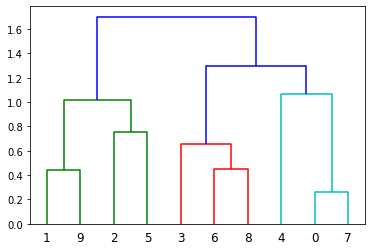

In [5]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.show()

In [6]:
def print_cluster(data, y, cluster_num):
  print(f"Clustering data for {cluster_num+1}")
  for n in range(len(data)):
    if y[n] == cluster_num:
      print(n, data[n])
  print(f"====================")
  print(f"")

In [7]:
NUMBER_OF_CLUSTER = 3
from sklearn.cluster import AgglomerativeClustering
hac = AgglomerativeClustering(n_clusters = NUMBER_OF_CLUSTER, affinity = 'euclidean', linkage = 'ward')
y_hac = hac.fit_predict(X)
for i in range(NUMBER_OF_CLUSTER):
  print_cluster(sentences, y_hac, i)

Clustering data for 1
0 AABAAABBBAACD
4 ABBBBBBBBBBB
7 ABCAAAABBE

Clustering data for 2
1 ACDAAABBBCCCDDD
2 CCDDDCDDDDDCCC
5 DEADEADDDDDE
9 ABCBCBCBCDDD

Clustering data for 3
3 ABCDEABCDEABCDE
6 BCBBBBCDCBBEEEEE
8 ABBEEABCEE



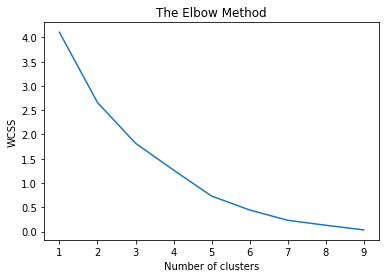

In [8]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,10): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,10), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [9]:
NUMBER_OF_CLUSTER = 3
kmeans = KMeans(n_clusters = NUMBER_OF_CLUSTER, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)
print(silhouette_score(X, y_kmeans))

for i in range(NUMBER_OF_CLUSTER):
  print_cluster(sentences, y_kmeans, i)

0.2539192732511972
Clustering data for 1
1 ACDAAABBBCCCDDD
2 CCDDDCDDDDDCCC
5 DEADEADDDDDE
9 ABCBCBCBCDDD

Clustering data for 2
0 AABAAABBBAACD
4 ABBBBBBBBBBB
7 ABCAAAABBE

Clustering data for 3
3 ABCDEABCDEABCDE
6 BCBBBBCDCBBEEEEE
8 ABBEEABCEE



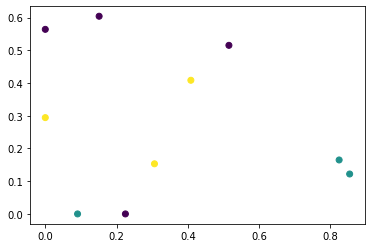

In [10]:
plt.scatter(X[:,0], X[:, 2], c= y_kmeans )


In [11]:
# Manually Calculate Kmeans

In [12]:
import math
from collections import defaultdict

D = X


def distance(a, b):
    distance = 0
    for i in range(len(a)):
        distance += math.pow(a[i] - b[i], 2)
    return round(math.sqrt(distance), 3)


distance_square = defaultdict(dict)
least_len = 100000000000000000000000000
least_i = 0
least_j = 0
order = []
for i in range(len(D)):
    for j in range(i + 1, len(D)):
        dd = distance(D[i], D[j])
        distance_square[i][j] = dd
        distance_square[j][i] = dd
        order.append((dd, i + 1, j + 1))
        if dd < least_len:
            least_len = dd
            least_i = i
            least_j = j

# distance_square[j][i] = dd


def find_avg(arr):
    # Array is a list of averge
    # D1 D2, D3
    new_array = defaultdict(int)
    for i in range(len(arr)):
        for j in range(len(D[arr[i]])):
            new_array[j] += D[arr[i]][j]
    for j in range(len(D[arr[0]])):
        new_array[j] = new_array[j] / len(arr)
    return new_array


# print(distance_square)
A = []
for i in range(len(D)):
    for j in range(len(D)):
        for z in range(len(D)):
            A.append((i, j, z))
# print(A)


class Point(object):
    # Point definition
    def __init__(self, vector, name):
        self.vector = vector
        self.name = name

    def __repr__(self):
        return self.name


class Group(object):
    # List of Point
    def __init__(self, points=None):
        self.points = points

    def __repr__(self):
        return self.__str__()

    def __str__(self):
        result = "{"
        for point in self.points:
            result += str(point) + ","
        result = result[:-1]
        return result + "}"

    def get_a_point(self):
        total = 0
        count = 0
        for i, p1 in self.points:
            for j, p2 in self.points:
                if j > i:
                    total += point_distance(p1, p2)
                    count += 1
        return total / count

    def contain_point(self, point):
        for p1 in self.points:
            if str(p1) == str(point):
                return True
        else:
            False

    def add_point(self, point):
        self.points.append(point)

    def remove_point(self, point):
        new_points = []
        for p1 in self.points:
            if str(point) != str(p1):
                new_points.append(p1)
        self.points = new_points

    def get_central(self):
        # Return central vector
        central = []
        for i in range(len(self.points[0].vector)):
            total = 0
            count = 0
            for j in range(len(self.points)):
                total += self.points[j].vector[i]
                count += 1
            central.append(total / count)
        return Point(central, "GroupCentral")


class AllGroup(object):
    # List of current group

    def __init__(self, groups=None, algo="single"):
        self.groups = groups
        self.algo = algo

    def __repr__(self):
        return self.__str__()

    def __str__(self):
        result = ""
        for group in self.groups:
            result += str(group) + ","
        return result[:-1]

    def merge(self):
        min_distance = None
        new_g1 = None
        new_g2 = None
        new_groups = []
        del_position = 0
        for position1, g1 in enumerate(self.groups):
            for position2, g2 in enumerate(self.groups):
                if position1 == position2:
                    continue
                distance = group_distance(g1, g2, self.algo)
                if not min_distance or distance < min_distance:
                    min_distance = distance
                    new_g1 = g1
                    new_g2 = g2
                    del_position = position2
        new_g1.points += new_g2.points
        for position, group in enumerate(self.groups):
            if position != del_position:
                new_groups.append(group)
        self.min_distance = min_distance
        self.groups = new_groups

    def get_s_point(self):
        s_dict = defaultdict(float)
        b_dict = defaultdict(float)
        a_dict = defaultdict(float)
        for i, group1 in enumerate(self.groups):
            # Get all group and point
            points1 = group1.points
            if len(points1) == 1:
                s_dict[str(points1[0])] = 0
                continue
            for j, point1 in enumerate(group1.points):
                total = 0
                count = 0
                for z, point2 in enumerate(group1.points):
                    if z == j:
                        continue
                    total += point_distance(point1, point2)
                    count += 1
                a_dict[str(point1)] = total / count

                min_external = None
                for z, group2 in enumerate(self.groups):
                    total = 0
                    count = 0
                    if z == i:
                        continue

                    for zz, pointzz in enumerate(group2.points):
                        total += point_distance(point1, pointzz)
                        count += 1
                    if min_external is None or (total / count) < min_external:
                        min_external = total / count

                b_dict[str(point1)] = min_external

                if a_dict[str(point1)] < b_dict[str(point1)]:
                    s_dict[str(point1)] = 1 - (
                        a_dict[str(point1)] / b_dict[str(point1)]
                    )
                else:
                    s_dict[str(point1)] = (
                        b_dict[str(point1)] / a_dict[str(point1)]
                    ) - 1
        return a_dict, b_dict, s_dict


def point_distance(p1, p2):
    a = p1.vector
    b = p2.vector
    distance = 0
    for i in range(len(a)):
        distance += math.pow(a[i] - b[i], 2)
    return round(math.sqrt(distance), 3)


def group_avg_point_distance(g1, p1):
    p2 = g1.get_central()
    return point_distance(p1, p2)


def group_distance(g1, g2, algo="single"):
    result = None
    if algo == "single":
        for p1 in g1.points:
            for p2 in g2.points:
                pd = point_distance(p1, p2)
                if result is None or pd < result:
                    result = pd
        # print(g1, g2, str(result).replace(".", ","))
        return result
    if algo == "complete":
        for p1 in g1.points:
            for p2 in g2.points:
                pd = point_distance(p1, p2)
                if result is None or pd > result:
                    result = pd
        # print(g1, g2, str(result).replace(".", ","))
        return result
    num_of_link = 0
    result = 0
    for p1 in g1.points:
        for p2 in g2.points:
            pd = point_distance(p1, p2)
            num_of_link += 1
            result += pd
    if algo == "centroid":
        return result / num_of_link
    else:
        for i, p1 in enumerate(g1.points):
            for j, p2 in enumerate(g1.points):
                if j > i:
                    pd = point_distance(p1, p2)
                    num_of_link += 1
                    result += pd
        for i, p1 in enumerate(g2.points):
            for j, p2 in enumerate(g2.points):
                if p1 != p2:
                    pd = point_distance(p1, p2)
                    num_of_link += 1
                    result += pd
        return result / num_of_link


def calculate_hac(algo="single"):
    groups = []
    num = 0
    for d in D:
        point = Point(d, f"D{num}")
        groups.append(Group([point]))
        num += 1
    all_group = AllGroup(groups, algo)

    number_of_group = 3

    for i in range(len(all_group.groups) - 1):
        all_group.merge()
        # print(all_group, all_group.min_distance)
        # print("======================================")
        if number_of_group == len(all_group.groups):
            _, _, s_dict = all_group.get_s_point()
            print(all_group)
            print(sum(s_dict.values()) / len(s_dict))
            break


print("HAC Complete")
calculate_hac("complete")
print("HAC Centroid")
calculate_hac("centroid")
print("HAC Single")
calculate_hac("single")


def manual_calculate():
    num = 1
    ps = []
    for d in D:
        ps.append(Point(d, f"D{num}"))
        num += 1

    all_group = AllGroup(
        [
            Group([ps[0], ps[1], ps[2], ps[4], ps[9]]),
            Group([ps[3], ps[5], ps[6]]),
            Group([ps[7], ps[8]]),
        ],
        "single",
    )

    a_dict, b_dict, s_dict = all_group.get_s_point()
    for i in range(len(D)):
        key = f"D{i+1}"
        # print(key, a_dict[key], b_dict[key], s_dict[key])
    print(sum(s_dict.values()) / len(s_dict))


# manual_calculate()


def k_means(points, all_group):
    while True:
        change_color = defaultdict(lambda: None)
        # print(all_group)
        for point in points:
            min_distance = None
            min_group = None
            for i, group in enumerate(all_group.groups):
                if len(group.points) == 0:
                    print("Invalid seed try again")
                    print(all_group)
                    return
                distance = group_avg_point_distance(group, point)
                if min_group is None or distance < min_distance:
                    min_group = i
                    min_distance = distance

            # print(point, min_group, min_distance)
            if min_group is not None and not all_group.groups[min_group].contain_point(
                point
            ):
                change_color[str(point)] = min_group

        # print(change_color)
        # Change color
        for point in points:
            if str(point) not in change_color.keys():
                continue
            for i, group in enumerate(all_group.groups):
                if i == change_color[str(point)]:
                    group.add_point(point)
                else:
                    group.remove_point(point)
        if not len(change_color.keys()):
            break
    return all_group


def start_kmean():
    maximum = 0
    best = None
    score_array = []
    points = []
    for i, d in enumerate(D):
        points.append(Point(d, f"D{i}"))
    for i in range(len(points)):
        for j in range(len(points)):
            for z in range(len(points)):
                if i == j or j == z or i == z:
                    continue
                group1 = Group([points[i]])
                group2 = Group([points[j]])
                group3 = Group([points[z]])
                all_group = AllGroup([group1, group2, group3], "single")
                result = k_means(points, all_group)
                _, _, s_point = result.get_s_point()
                s_score = sum(s_point.values()) / len(s_point)
                score_array.append({"result": result, "s_score": s_score})

    return sorted(score_array, key=lambda x: x["s_score"], reverse=True)


best_values = start_kmean()
previous = None
count = 0
for best_value in best_values:
    if count == 10:
        break
    if previous is None or previous != best_value["s_score"]:
        count += 1
        previous = best_value["s_score"]
        print(best_value)


HAC Complete
{D0,D7,D4},{D1,D9,D2,D5},{D3,D6,D8}
0.2540846909994984
HAC Centroid
{D0,D7,D3,D6,D8},{D1,D9,D2,D5},{D4}
0.16683583883818837
HAC Single
{D0,D7,D1,D9,D3,D6,D8,D2},{D4},{D5}
0.01594243564192266
{'result': {D0,D7},{D1,D2,D3,D5,D9},{D6,D4,D8}, 's_score': 0.30918257813424505}
{'result': {D0,D7},{D1,D2,D3,D5,D9},{D4,D6,D8}, 's_score': 0.30918257813424493}
{'result': {D9,D1,D2,D3,D5},{D0,D7},{D8,D6,D4}, 's_score': 0.3091825781342449}
{'result': {D0,D7},{D6,D3,D4,D8},{D9,D1,D2,D5}, 's_score': 0.27962504891443885}
{'result': {D0,D4,D7},{D8,D6},{D1,D2,D3,D5,D9}, 's_score': 0.2649716468614159}
{'result': {D0,D4,D7},{D1,D2,D3,D5,D9},{D8,D6}, 's_score': 0.26497164686141583}
{'result': {D2,D1,D5,D9},{D6,D3,D8},{D4,D0,D7}, 's_score': 0.25408469099949843}
{'result': {D0,D4,D7},{D2,D5,D9,D1},{D8,D3,D6}, 's_score': 0.2540846909994984}
{'result': {D0,D7},{D8,D3,D6},{D9,D1,D2,D4,D5}, 's_score': 0.25347101520588555}
{'result': {D1,D2,D9},{D6,D3,D4,D5,D8},{D7,D0}, 's_score': 0.24641309487197877}

In [13]:
y_means_improved = []
y_map = {} 
for i, group in enumerate(best_values[0]["result"].groups):
  for point in group.points:
    y_map[int(point.name[1:])] = i

for i in range(len(X)):
  y_means_improved.append(y_map[i])


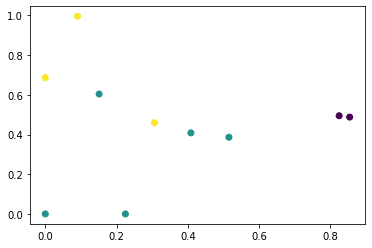

In [14]:
plt.scatter(X[:,0], X[:, 1], c= y_means_improved )


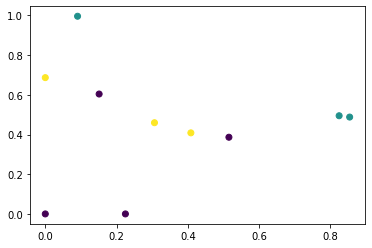

In [15]:
plt.scatter(X[:,0], X[:, 1], c= y_kmeans )


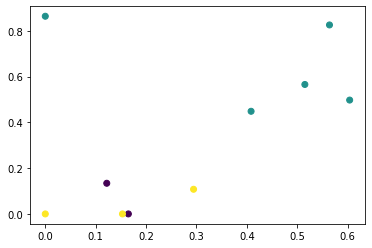

In [16]:
plt.scatter(X[:,2], X[:, 3], c= y_means_improved )


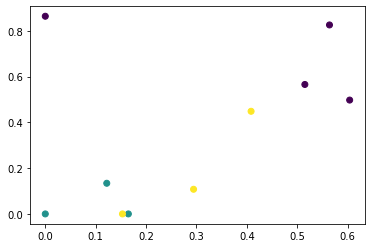

In [17]:
plt.scatter(X[:,2], X[:, 3], c= y_kmeans )


In [18]:

for i in range(NUMBER_OF_CLUSTER):
  print_cluster(sentences, y_means_improved, i)

Clustering data for 1
0 AABAAABBBAACD
7 ABCAAAABBE

Clustering data for 2
1 ACDAAABBBCCCDDD
2 CCDDDCDDDDDCCC
3 ABCDEABCDEABCDE
5 DEADEADDDDDE
9 ABCBCBCBCDDD

Clustering data for 3
4 ABBBBBBBBBBB
6 BCBBBBCDCBBEEEEE
8 ABBEEABCEE



In [19]:
# Second time with word to 

In [28]:
sentences = [list(sentence) for sentence in sentences]
vectormodel = Word2Vec(sentences, min_count=1, size=10)

In [29]:
print(vectormodel.wv.vocab)
X = vectormodel[vectormodel.wv.vocab]

{'A': <gensim.models.keyedvectors.Vocab object at 0x7fbc5d6030d0>, 'B': <gensim.models.keyedvectors.Vocab object at 0x7fbc5d603410>, 'C': <gensim.models.keyedvectors.Vocab object at 0x7fbc5d603690>, 'D': <gensim.models.keyedvectors.Vocab object at 0x7fbc5d603090>, 'E': <gensim.models.keyedvectors.Vocab object at 0x7fbc5d603450>}


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [30]:
X

array([[-0.03612556, -0.03551049,  0.04784604, -0.00624338,  0.02939799,
        -0.02552349,  0.001032  , -0.03246105,  0.03394357, -0.01974876],
       [ 0.0067381 , -0.03111349, -0.00679789, -0.03253379, -0.03479651,
        -0.00613825, -0.03426738,  0.00908193, -0.01317648, -0.01381683],
       [-0.04711027,  0.02087506, -0.01478459, -0.01484687, -0.04019996,
        -0.0068461 ,  0.04979215,  0.01695004,  0.03063238,  0.04117559],
       [ 0.02976276, -0.03613866, -0.03295236, -0.00464692,  0.02736335,
         0.02802246, -0.00665367, -0.01191096, -0.00148726,  0.01283875],
       [ 0.03461262,  0.01164449,  0.01122697,  0.01812017,  0.03280509,
        -0.0348837 ,  0.00723085, -0.00152751, -0.04944887,  0.0072775 ]],
      dtype=float32)

In [31]:
def vectorize(list_of_docs, model):
    """Generate vectors for list of documents using a Word Embedding

    Args:
        list_of_docs: List of documents
        model: Gensim's Word Embedding

    Returns:
        List of document vectors
    """
    features = []

    for tokens in list_of_docs:
        zero_vector = np.zeros(model.vector_size)
        vectors = []
        for token in tokens:
            if token in model.wv:
                try:
                    vectors.append(model.wv[token])
                except KeyError:
                    continue
        if vectors:
            vectors = np.asarray(vectors)
            avg_vec = vectors.mean(axis=0)
            features.append(avg_vec)
        else:
            features.append(zero_vector)
    return features
    
vectorized_docs = vectorize(sentences, model=vectormodel)
len(vectorized_docs), len(vectorized_docs[0])


(10, 10)

In [32]:
kmeans = KMeans(n_clusters = NUMBER_OF_CLUSTER, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans_w2v = kmeans.fit_predict(vectorized_docs)
print(silhouette_score(vectorized_docs, y_kmeans_w2v))

0.27515134


In [33]:
for i in range(NUMBER_OF_CLUSTER):
  print_cluster(sentences, y_kmeans_w2v, i)

Clustering data for 1
1 ['A', 'C', 'D', 'A', 'A', 'A', 'B', 'B', 'B', 'C', 'C', 'C', 'D', 'D', 'D']
2 ['C', 'C', 'D', 'D', 'D', 'C', 'D', 'D', 'D', 'D', 'D', 'C', 'C', 'C']
3 ['A', 'B', 'C', 'D', 'E', 'A', 'B', 'C', 'D', 'E', 'A', 'B', 'C', 'D', 'E']
5 ['D', 'E', 'A', 'D', 'E', 'A', 'D', 'D', 'D', 'D', 'D', 'E']
6 ['B', 'C', 'B', 'B', 'B', 'B', 'C', 'D', 'C', 'B', 'B', 'E', 'E', 'E', 'E', 'E']
8 ['A', 'B', 'B', 'E', 'E', 'A', 'B', 'C', 'E', 'E']
9 ['A', 'B', 'C', 'B', 'C', 'B', 'C', 'B', 'C', 'D', 'D', 'D']

Clustering data for 2
4 ['A', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B']

Clustering data for 3
0 ['A', 'A', 'B', 'A', 'A', 'A', 'B', 'B', 'B', 'A', 'A', 'C', 'D']
7 ['A', 'B', 'C', 'A', 'A', 'A', 'A', 'B', 'B', 'E']

